# Name - Harsh Maurya
# TSF_TASK_3
# Create the Decision Tree classifier and visualize it graphically.

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  statsmodels.api  as sm
import seaborn as sns

In [99]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [101]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [102]:
df = df.drop('Id',axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [103]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [66]:
df_col = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [67]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

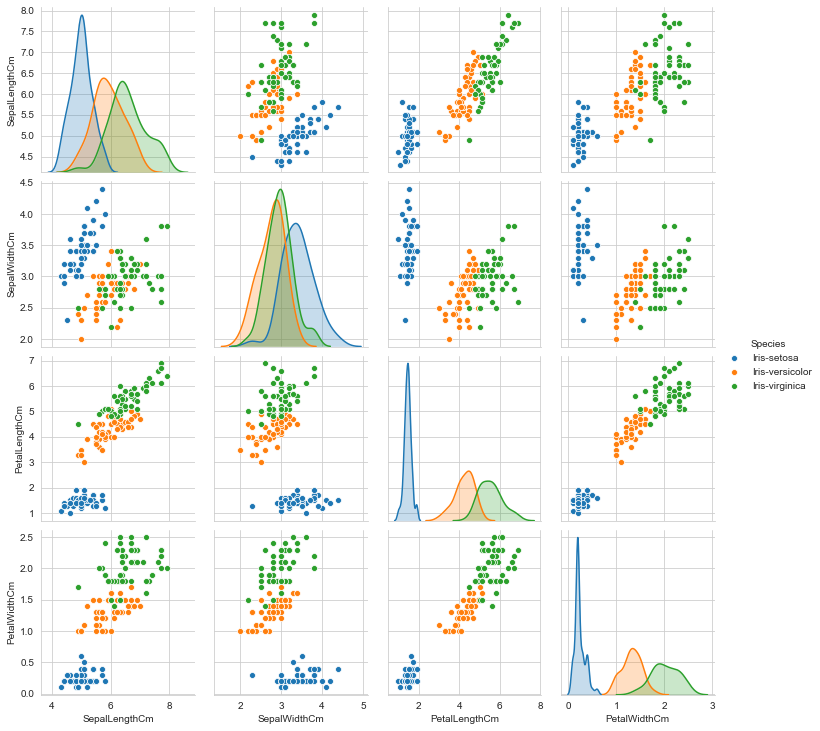

In [68]:
sns.pairplot(df,hue='Species')

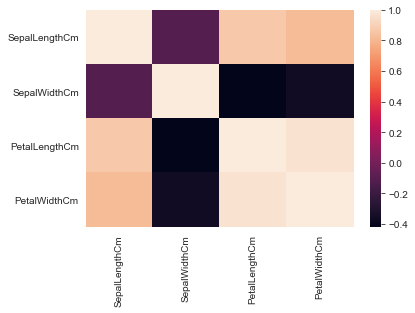

In [69]:
sns.heatmap(X.corr())

In [70]:
sns.set_style('whitegrid')

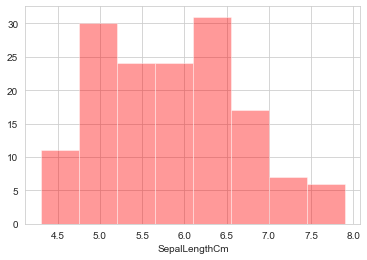

In [71]:
sns.distplot(df['SepalLengthCm'],kde=False,color='r')

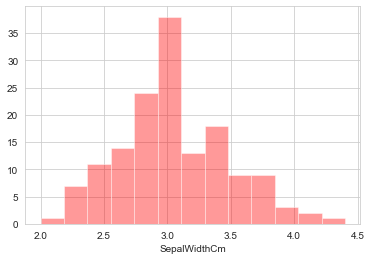

In [72]:
sns.distplot(df['SepalWidthCm'],kde=False,color='r')

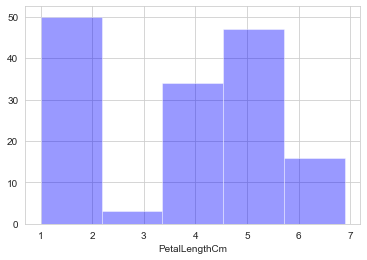

In [73]:
sns.distplot(df['PetalLengthCm'],kde=False,color='b')

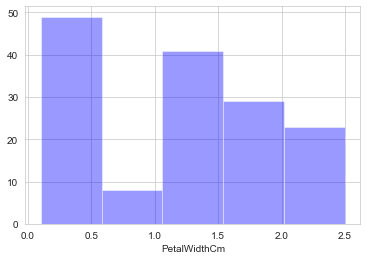

In [74]:
sns.distplot(df['PetalWidthCm'],kde=False,color='b')

# Train

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
tree = DecisionTreeClassifier()

In [79]:
tree_fit = tree.fit(X_train,y_train)

# Predict

In [80]:
prediction = tree_fit.predict(X_test)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



In [83]:
print(confusion_matrix(y_test,prediction))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [84]:
from six import StringIO    
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

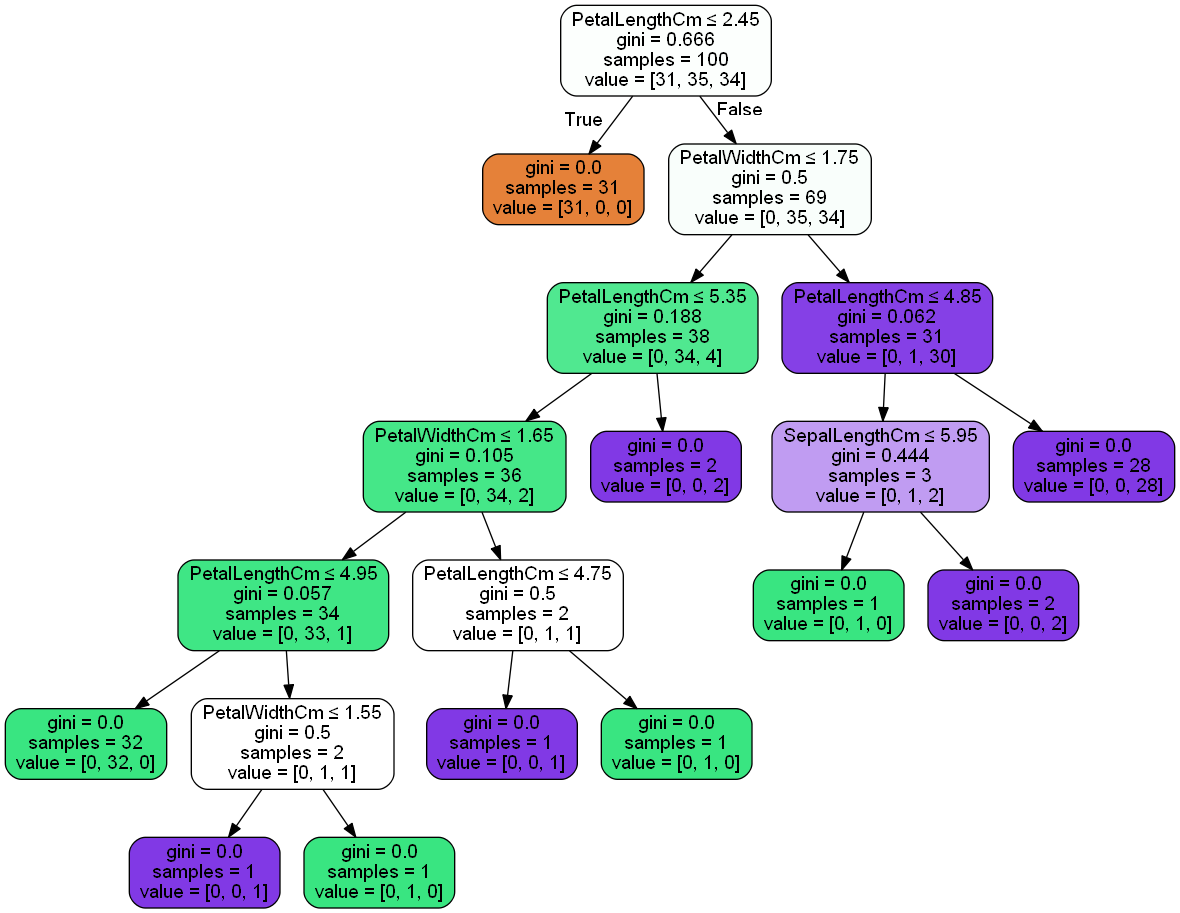

In [85]:


dot_data = StringIO()

export_graphviz(tree, out_file=dot_data, feature_names=df_col, filled=True,rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


graph.write_png('tree.png')

Image(graph.create_png())

# New Data Predict

In [86]:
tree_fit.predict([[6.8,3.0,4.0,3.0]])

array(['Iris-virginica'], dtype=object)

In [92]:
tree_fit.predict([[5.0,9.0,6.0,4.0]])

array(['Iris-virginica'], dtype=object)